# [Star Type Classification / NASA](https://www.kaggle.com/datasets/brsdincer/star-type-classification)

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# EDA

In [20]:
df = pd.read_csv('stars.csv')
print(f'Shape: {df.shape}')
df.head()

Shape: (240, 7)


,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0


In [21]:
df.isna().any()

Temperature       False
L                 False
R                 False
A_M               False
Color             False
Spectral_Class    False
Type              False
dtype: bool

In [22]:
df['Type'].unique()

array([0, 1, 2, 3, 4, 5])

In [23]:
mapping = {0: 'red_dwarf', 
           1: 'brown_dwarf',
           2: 'white_dwarf',
           3: 'main_sequence', 
           4: 'super_giants', 
           5: 'hyper_giants'}

# Build Model

In [24]:
df = pd.get_dummies(df, columns=['Color', 'Spectral_Class'], drop_first=True)
X = df.drop('Type', axis=1)  
y = df['Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

# Predict and Evaluate

In [25]:
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9791666666666666

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.90      1.00      0.95         9
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00        10

    accuracy                           0.98        48
   macro avg       0.98      0.98      0.98        48
weighted avg       0.98      0.98      0.98        48



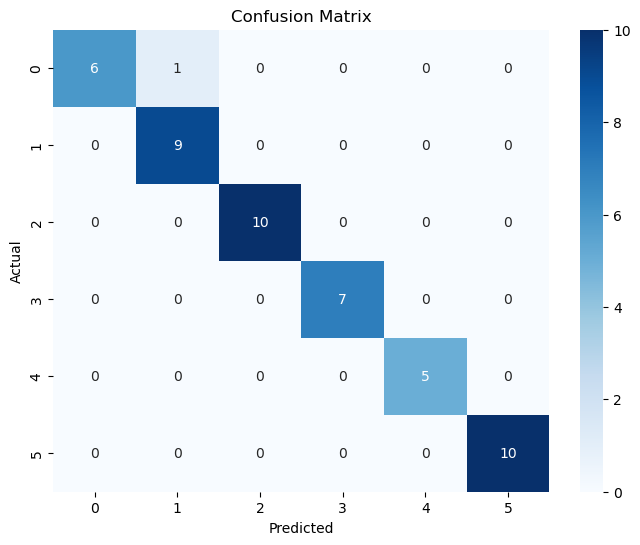

In [26]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=rf.classes_, yticklabels=rf.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Feature Importance

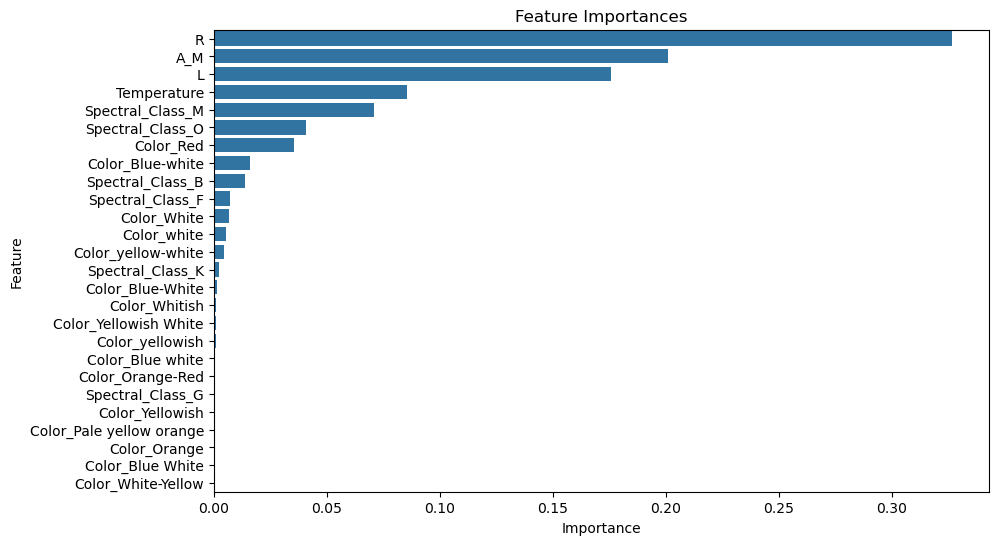

In [27]:
importances = rf.feature_importances_
feature_names = X.columns

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances')
plt.show()